In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import pdb
pd.set_option('max_rows', 1500)
pd.options.display.max_rows = 999 
pd.options.display.max_rows
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

height has been deprecated.



In [2]:
df = pd.read_csv('ex2data1.txt', names=['Exam 1 score', 'Exam 2 score', 'Admitted?'])
admitted = df[df['Admitted?'].isin([1])]
notAdmitted = df[df['Admitted?'].isin([0])]

X_data = df['Exam 1 score']
y_data = df['Exam 2 score']
admit = df['Admitted?']

df

,Exam 1 score,Exam 2 score,Admitted?
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


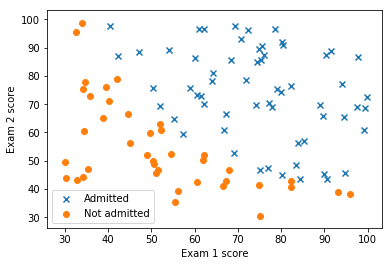

In [3]:
plt.scatter(admitted['Exam 1 score'], admitted['Exam 2 score'], marker='x', label="Admitted")
plt.scatter(notAdmitted['Exam 1 score'], notAdmitted['Exam 2 score'], marker='o', label="Not admitted")
plt.legend()
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [4]:
def sigmoid(x):
    return 1.0/(1+ math.exp(-x))

print(sigmoid(9)) # larger x -> 1
print(sigmoid(-9)) # smaller x -> 0
print(sigmoid(0)) # x = 0 -> 0.5

0.9998766054240137
0.00012339457598623172
0.5


In [5]:
X_matrix = df.as_matrix(df.columns[:-1])
#X_matrix = np.insert(X_matrix, 0, 1, axis=1) # remember to insert column of 1's for X_0
#X_matrix = np.matrix(X_matrix)
y = df[df.columns[-1:]].as_matrix() # admitted or not

In [8]:
# now need to be able to do this for a matrix

def sigmoidMatrix(matrix):
    for x in np.nditer(matrix, op_flags=['readwrite']):
        x[...]=sigmoid(x)
    return matrix

# compute cost

def computeCost(X, y, theta):
    m = len(y)
    h = sigmoidMatrix(X*theta) # vectorization
    cost = (-y.T * np.log(h) - (1-y).T * np.log(1-h))/m
    return cost

# gradient descent, should be the same as multi and single LR 
# except for slight tweek

numCols = df.shape[1] - 1 # no more 1's column
theta = np.matrix(np.ones((numCols,1))) # initialize theta to be 0

iterations = 1500
alpha = 0.01

def gradientDescent(X, y, theta, alpha, num_iters):
    pdb.set_trace()
    m = len(y)
    J_history = np.zeros((num_iters,1)) 
    # keep track of the value of each error as we iterate
    
    for i in range(num_iters):  
        
        error = sigmoidMatrix(X*theta) - y 
        #tweeked here, notice we use sigmoidMatrix
        
        theta = theta - (alpha/m) * (X.T * error)
        
        J_history[[i]] = computeCost(X,y,theta)
        # To see value of cost at each iteration
    
    return (theta, J_history)

result = gradientDescent(X_matrix,y,theta,alpha,iterations)
theta = result[0]
J_history = result[1]

print('theta: ')
print(pd.DataFrame(theta))
print('\n J_history:')
print(pd.DataFrame(J_history))

> <ipython-input-8-22d577f095fe>(27)gradientDescent()
-> m = len(y)
(Pdb) c


/Users/eddiewang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


theta: 
          0
0  0.560792
1  0.102363

 J_history:
             0
0          NaN
1          NaN
2          NaN
3     6.240294
4     5.923288
5          NaN
6     7.042621
7     4.217093
8          NaN
9     7.737115
10    2.771471
11         NaN
12    7.502864
13    3.227495
14         NaN
15    7.620115
16    2.982245
17         NaN
18    7.226171
19    3.762371
20         NaN
21    7.517304
22    3.171095
23         NaN
24    6.905908
25    4.392464
26         NaN
27    7.374375
28    3.441258
29         NaN
30    6.685392
31    4.820183
32         NaN
33    7.195478
34    3.782523
35         NaN
36    6.558836
37    5.055058
38         NaN
39    7.022315
40    4.113908
41         NaN
42    6.424650
43    5.307200
44         NaN
45    6.846564
46    4.451174
47         NaN
48    6.299124
49    5.542710
50         NaN
51    6.668247
52    4.794183
53         NaN
54    6.179751
55    5.766693
56         NaN
57    6.486725
58    5.144097
59         NaN
60    6.065259
61    5.98169